# Import Libraries

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
import warnings

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

warnings.filterwarnings("always")
warnings.filterwarnings("ignore")

# Importing Data

In [2]:
df = pd.read_csv(r'C:\Users\tsubo\OneDrive\Documents\anime.csv')

In [3]:
df.head(3)

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262


In [4]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12017 entries, 0 to 12293
Data columns (total 7 columns):
anime_id    12017 non-null int64
name        12017 non-null object
genre       12017 non-null object
type        12017 non-null object
episodes    12017 non-null object
rating      12017 non-null float64
members     12017 non-null int64
dtypes: float64(1), int64(2), object(4)
memory usage: 751.1+ KB


I dropped the null values from the data set. Now I want to check how many genres there are.
Most shows are considered in multiple genres, so different genres are combined and they created different genres from the computer perspective.
I need to ignore the combinations of multiple genres.

In [5]:
genrestring = ''
for i in df.genre:
    genrestring = genrestring + i.strip() + ','
    
genres=list(set(genrestring.replace(r' ','').split(',')))[1:] 

print(f'There are {len(genres)} unique genres here is the complete list: \n {genres}')

There are 43 unique genres here is the complete list: 
 ['Historical', 'Shounen', 'Music', 'MartialArts', 'Cars', 'Seinen', 'Mecha', 'ShoujoAi', 'Comedy', 'Demons', 'Fantasy', 'SuperPower', 'SliceofLife', 'Supernatural', 'Parody', 'Military', 'Space', 'Drama', 'Action', 'School', 'Game', 'ShounenAi', 'Dementia', 'Sci-Fi', 'Yaoi', 'Thriller', 'Police', 'Adventure', 'Vampire', 'Psychological', 'Ecchi', 'Mystery', 'Kids', 'Sports', 'Josei', 'Samurai', 'Shoujo', 'Magic', 'Horror', 'Harem', 'Yuri', 'Romance', 'Hentai']


So I gathered the lines in a string and removed the spaces between the words, then created a list separating the string using ',' as separator. Later I converted the list into a set to get rid of the duplicates and again converted it back to a list.It seems to be 43 different genres.

In [6]:
Number = []
Avgrating = []
Totalmembers = []

for t in genres:
    Number.append(df.loc[df.genre.str.contains(t)==True]['name'].count())
    Avgrating.append(df.loc[df.genre.str.contains(t)==True]['rating'].mean())
    Totalmembers.append(df.loc[df.genre.str.contains(t)==True]['members'].sum())

Comparison_genre = pd.DataFrame({'Number': Number,'Average_Rating':Avgrating,'Total_members':Totalmembers},index=genres)
Comparison_genre.dropna(inplace=True)
Comparison_genre.sort_values('Number',ascending=False)
Comparison_genre.head(3)


,Number,Average_Rating,Total_members
Historical,798,6.746216,11372418
Shounen,1745,7.054642,55099478
Music,842,5.923017,6004126


I calculated the number of shows, average rating and total members for each genre, and created a data frame.

In [7]:
Comparison_genre = Comparison_genre.loc[(Comparison_genre.Number > Comparison_genre.Number.quantile(0.4))&(Comparison_genre.Total_members > Comparison_genre.Total_members.quantile(0.4))]

I weed out the genres that are lower than 0.4 quantile of total numbers and total members.

In [8]:
x1 = Comparison_genre.Number
x2 = Comparison_genre.Average_Rating
x3 = Comparison_genre.Total_members
y = Comparison_genre.index

I create my axes for plotting...

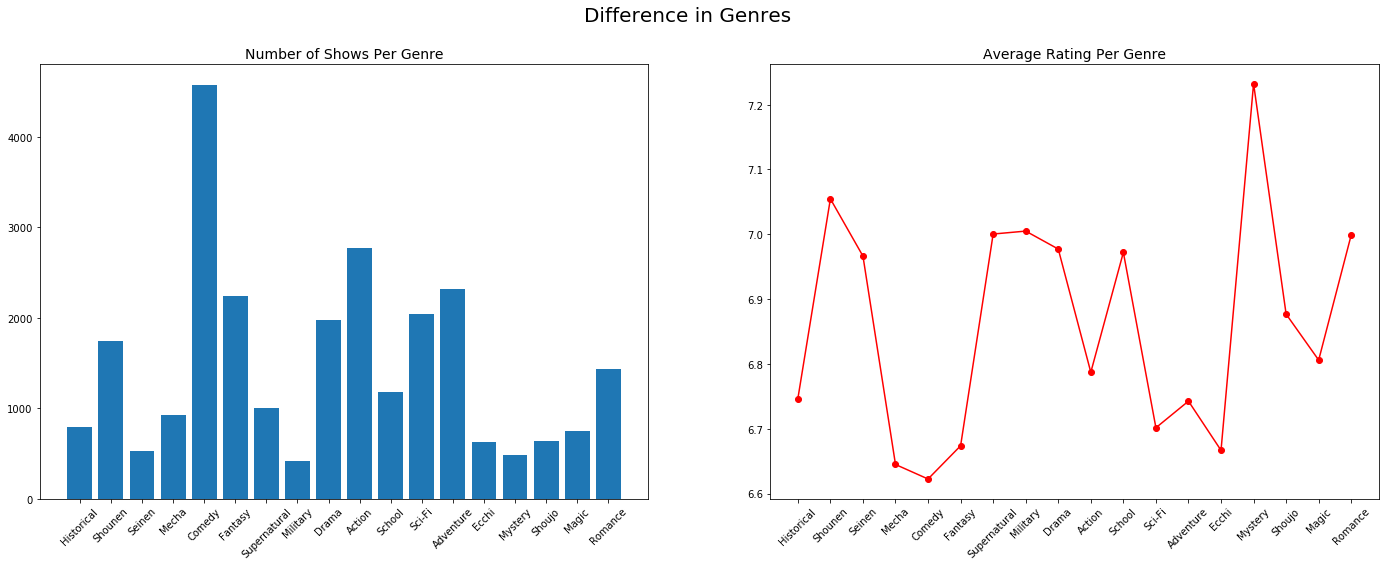

In [9]:
fig,[ax1,ax2] = plt.subplots(1,2,figsize=(24,8))
plt.suptitle('Difference in Genres',size=20)
ax1.set_xticklabels(y, rotation=45)
ax1.set_title('Number of Shows Per Genre',size = 14)
ax1.bar(y,x1)
ax2.set_title('Average Rating Per Genre',size = 14)
ax2.set_xticklabels(y, rotation=45)
ax2.plot(y,x2,color='r',marker='o')

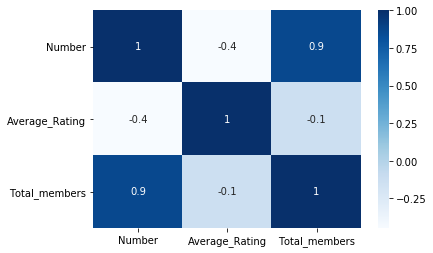

In [10]:
corr=Comparison_genre.corr()
heatmap = sns.heatmap(corr, annot=True, cmap="Blues", fmt='.1g')

I plotted two charts to visualize my findings. The rating scores are inclined to drop when the number of shows increase in a genre. Our correlation matrix confirms this. The most successful genre is mystery when checked the number of shows in mystery genre, we see it is 485, one of the least ones in the list.

On the other hand, Comedy genre, being the most produced genres, is the least rated of all. Drama does a good joob maintaining a decent number of shows with relatively high rating score.

In [11]:
print(f'There are {len(list(df.type.unique()))} unique types, here is the whole list:\n {df.type.unique()}')

There are 6 unique types, here is the whole list:
 ['Movie' 'TV' 'OVA' 'Special' 'Music' 'ONA']


In [12]:
typelist = list(df.type.unique())
Numbert = []
Avgratingt = []
Totalmemberst = []

for t in typelist:
    Numbert.append(df.loc[df.type.str.contains(t)==True]['name'].count())
    Avgratingt.append(df.loc[df.type.str.contains(t)==True]['rating'].mean())
    Totalmemberst.append(df.loc[df.type.str.contains(t)==True]['members'].sum())

Comparison_type = pd.DataFrame({'Number': Numbert,'Average_Rating':Avgratingt,'Total_members':Totalmemberst},index=typelist)
Comparison_type.dropna(inplace=True)
Comparison_type.sort_values('Number',ascending=False)
Comparison_type

,Number,Average_Rating,Total_members
Movie,2259,6.334055,23865229
TV,3668,6.903321,160685404
OVA,3284,6.375411,19755618
Special,1670,6.523126,12846511
Music,488,5.588996,640178
ONA,648,5.650293,2705539


In [13]:
path = r'C:\Users\tsubo\Data Analytics\Anime Recommendations\Data'

In [16]:
Comparison_genre.to_csv(os.path.join(path, 'comparison_genre.csv'))